In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [6]:
data = pd.read_csv('car price.csv')

In [7]:
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [9]:
data.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [10]:
features = [
    'Make',
    'Model',
    'Year',
    'Engine HP',
    'Engine Cylinders',
    'Transmission Type',
    'Vehicle Style',
    'highway MPG',
    'city mpg',
    'MSRP'

]

In [11]:
df = data[features]
df.shape

(11914, 10)

In [12]:
df.isnull().sum()

Make                  0
Model                 0
Year                  0
Engine HP            69
Engine Cylinders     30
Transmission Type     0
Vehicle Style         0
highway MPG           0
city mpg              0
MSRP                  0
dtype: int64

In [13]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_features = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_features:
    df[c] = df[c].str.lower().str.replace(' ', '_')

df['engine_hp'] = df['engine_hp'].fillna(0)
df['engine_cylinders'] = df['engine_cylinders'].fillna(0)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_35852\874320154.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[c] = df[c].str.lower().str.replace(' ', '_')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_35852\874320154.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['engine_hp'] = df['engine_hp'].fillna(0)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_35852\874320154.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

In [14]:
df.isnull().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
msrp                 0
dtype: int64

In [15]:
df[categorical_features].head()

,make,model,transmission_type,vehicle_style
0,bmw,1_series_m,manual,coupe
1,bmw,1_series,manual,convertible
2,bmw,1_series,manual,coupe
3,bmw,1_series,manual,coupe
4,bmw,1_series,manual,convertible


In [16]:
df.shape

(11914, 10)

In [17]:
df['above_average'] = (df['msrp'] > df['msrp'].mean()) * 1

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_35852\820204367.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['above_average'] = (df['msrp'] > df['msrp'].mean()) * 1


In [18]:
df['above_average'].head().T

0    1
1    1
2    0
3    0
4    0
Name: above_average, dtype: int32

In [19]:
del df['msrp']

In [20]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train['above_average'].values
y_val = df_val['above_average'].values
y_test = df_test['above_average'].values

del df_train['above_average']
del df_val['above_average']
del df_test['above_average']

In [21]:
len(df_train), len(df_val), len(df_test)

(7148, 2383, 2383)

In [22]:
len(y_train), len(y_val), len(y_test)

(7148, 2383, 2383)

# Question 1

In [23]:
numerical_features = df.select_dtypes(include=np.number).columns.tolist()
numerical_features.remove('above_average')

In [24]:
numerical_features

['year', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg']

In [25]:
from sklearn.metrics import roc_auc_score

In [26]:
num_scores = []

for num in numerical_features:
    score = roc_auc_score(y_train, df_train[num])
    if score >= 0.5:
        num_scores.append([num, score])
    else:
        num_scores.append([num, roc_auc_score(y_train, -df_train[num])])

num_scores.sort(key=lambda x: x[1], reverse=True)
num_scores, num_scores[0], num_scores[0][0]

([['engine_hp', 0.9171031265539011],
  ['engine_cylinders', 0.766116490165669],
  ['year', 0.687551492804683],
  ['city_mpg', 0.6734244643245233],
  ['highway_mpg', 0.6330587871772013]],
 ['engine_hp', 0.9171031265539011],
 'engine_hp')

# Question 2

In [27]:
def question2_answer(df_train, y_train, df_val, y_val):
    
    dicts = df_train[numerical_features + categorical_features].to_dict(orient='records')
    dv = DictVectorizer(sparse=False)
    
    X_train = dv.fit_transform(dicts)
    
    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
    model.fit(X_train, y_train)

    val_dicts = df_val[numerical_features + categorical_features].to_dict(orient='records')
    
    X_val = dv.transform(val_dicts)
    y_pred = model.predict_proba(X_val)[:, 1]
    
    return round(roc_auc_score(y_val, y_pred), 3)

In [28]:
question2_answer(df_train, y_train, df_val, y_val)

0.976

# Question 3

In [30]:
def question3_answer(df_train, y_train, df_val, y_val):

    dicts = df_train[numerical_features + categorical_features].to_dict(orient='records')
    dv = DictVectorizer(sparse=False)
    
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
    model.fit(X_train, y_train)

    val_dicts = df_val[numerical_features + categorical_features].to_dict(orient='records')

    X_val = dv.transform(val_dicts)
    y_pred = model.predict_proba(X_val)[:, 1]
    
    thresholds = np.linspace(0, 1, 101)
    scores = []

    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    
    
    for t in thresholds:
        
        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)
        
        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()

        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()
        
        scores.append((t, tp, tn, fp, fn))
    
    columns = ['threshold', 'tp', 'tn', 'fp', 'fn']
    df_scores = pd.DataFrame(scores, columns=columns)
    df_scores['precision'] = df_scores['tp'] / (df_scores['tp'] + df_scores['fp'])
    df_scores['recall'] = df_scores['tp'] / (df_scores['tp'] + df_scores['fn'])

    plt.plot(df_scores['threshold'], df_scores['precision'], label='precision')
    plt.plot(df_scores['threshold'], df_scores['recall'], label='recall')
    plt.legend()
    
    equality = df_scores.query('precision == recall')['threshold']
    
    return equality

48    0.48
Name: threshold, dtype: float64

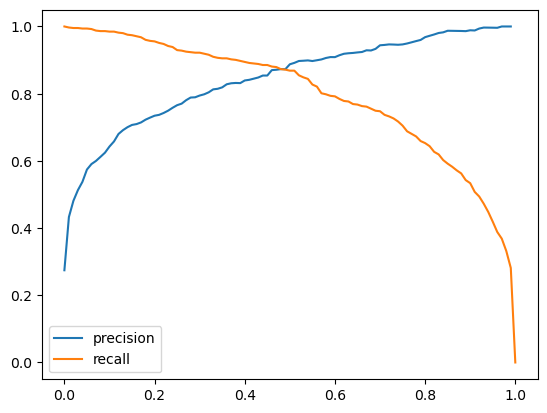

In [31]:
question3_answer(df_train, y_train, df_val, y_val)

# Question 4

In [32]:
def question4_answer(df_train, y_train, df_val, y_val):

    dicts = df_train[numerical_features + categorical_features].to_dict(orient='records')
    dv = DictVectorizer(sparse=False)

    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
    model.fit(X_train, y_train)

    val_dicts = df_val[numerical_features + categorical_features].to_dict(orient='records')

    X_val = dv.transform(val_dicts)
    y_pred = model.predict_proba(X_val)[:, 1]

    thresholds = np.linspace(0, 1, 101)
    scores = []

    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)


    for t in thresholds:

        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)

        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()

        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()

        scores.append((t, tp, tn, fp, fn))

    columns = ['threshold', 'tp', 'tn', 'fp', 'fn']
    df_scores = pd.DataFrame(scores, columns=columns)
    df_scores['precision'] = df_scores['tp'] / (df_scores['tp'] + df_scores['fp'])
    df_scores['recall'] = df_scores['tp'] / (df_scores['tp'] + df_scores['fn'])
    df_scores['f1'] = 2 * df_scores['precision'] * df_scores['recall'] / (df_scores['precision'] + df_scores['recall'])
    
    max_f1 = max(df_scores['f1'])
    
    return df_scores.query('f1 == @max_f1')['threshold']

In [33]:
question4_answer(df_train, y_train, df_val, y_val)

51    0.51
Name: threshold, dtype: float64

# Question 5

In [34]:
from sklearn.model_selection import KFold

In [35]:
from tqdm.auto import tqdm

In [36]:
def question5_answer(df_full_train):
    kfold = KFold(n_splits=5, shuffle=True, random_state=1)
    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train['above_average'].values
        y_val = df_val['above_average'].values

        dicts = df_train[numerical_features + categorical_features].to_dict(orient='records')
        dv = DictVectorizer(sparse=False)
        
        X_train = dv.fit_transform(dicts)

        model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
        model.fit(X_train, y_train)

        val_dicts = df_val[numerical_features + categorical_features].to_dict(orient='records')

        X_val = dv.transform(val_dicts)
        y_pred = model.predict_proba(X_val)[:, 1]

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)
        
    return np.std(scores)

In [37]:
round(question5_answer(df_full_train), 3)

0.003

# Question 6

In [38]:
C = [0.01, 0.1, 0.5, 10]

In [39]:
def question6_answer(df_full_train, C):
    
    answer = []
    
    for C in tqdm(C):
        kfold = KFold(n_splits=5, shuffle=True, random_state=1)
        scores = []
    
        for train_idx, val_idx in kfold.split(df_full_train):
            df_train = df_full_train.iloc[train_idx]
            df_val = df_full_train.iloc[val_idx]

            y_train = df_train['above_average'].values
            y_val = df_val['above_average'].values

            dicts = df_train[numerical_features + categorical_features].to_dict(orient='records')
            dv = DictVectorizer(sparse=False)

            X_train = dv.fit_transform(dicts)

            model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
            model.fit(X_train, y_train)

            val_dicts = df_val[numerical_features + categorical_features].to_dict(orient='records')

            X_val = dv.transform(val_dicts)
            y_pred = model.predict_proba(X_val)[:, 1]

            auc = roc_auc_score(y_val, y_pred)
            
            scores.append(auc)

        print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))
       
        answer.append((C, round(np.mean(scores), 3), round(np.std(scores), 3)))

    columns = ['C', 'mean', 'std']
    df_scores = pd.DataFrame(answer, columns=columns)
    
    display(df_scores)
    max_mean = max(df_scores['mean'])
    
    return df_scores.query('mean == @max_mean')['C']      

In [40]:
question6_answer(df_full_train, C)

  0%|          | 0/4 [00:00<?, ?it/s]

C=0.01 0.952 +- 0.002
C=0.1 0.972 +- 0.002
C=0.5 0.980 +- 0.003
C=10 0.982 +- 0.003


,C,mean,std
0,0.01,0.952,0.002
1,0.10,0.972,0.002
2,0.50,0.980,0.003
3,10.00,0.982,0.003


3    10.0
Name: C, dtype: float64